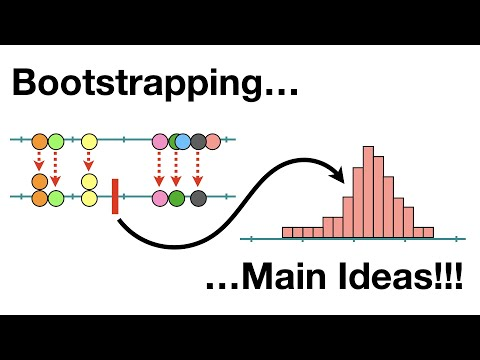

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

***Question 1***

The standard deviation measures the variability of the individual data points in a dataset, while the standard error of the mean measures the precision of the sample mean as an estimate of the population mean.

A lower standard deviation indicates data points are closer to the mean, while a lower standard error of the mean indicates a more precise estimate of the population mean.

The key difference between the two is that the standard deviation is about variability within a single sample of data points, while the standard error of the mean is about variability across multiple samples in estimating the population mean.

### Summary of Exchanges

https://chatgpt.com/share/66fb800b-59ec-8013-a9f9-e6703c95654c

1. **Difference Between Standard Error of the Mean and Standard Deviation**:
   - We discussed the definitions and interpretations of the **standard deviation (SD)** and the **standard error of the mean (SEM)**.
   - **Standard Deviation (SD)**: Measures the variability or dispersion of individual data points around the mean. A higher SD indicates more spread in the data.
   - **Standard Error of the Mean (SEM)**: Measures the precision of the sample mean as an estimate of the population mean. A lower SEM indicates that the sample mean is a more accurate estimate.
   - Key Differences: SD focuses on variability within a sample, while SEM focuses on variability across samples in estimating the population mean.

***Question 2***

1. **Calculate the mean of bootstrapped sample means.** To estimate of the population mean.
2. **Calculate the SEM.** It measures the variability of sample means.
3. **Determine the critical value.** For a 95% CI, the critical value is typically 1.96.
4. **Construct the 95% CI.** Take the mean of bootstrapped sample means and add/subtract the margin of error, which is the product of the SEM and the critical value.
5. **Interpret.** The CI will contain about 95% of the bootstrapped sample means, providing an estimate of the true population mean.

### Summary of Exchanges

https://chatgpt.com/share/66fb84f7-cfb0-8013-a9c4-2b5623b698c9

1. **Standard Error of the Mean and Confidence Intervals**: You asked how to use the "standard error of the mean" (SEM) to create a 95% confidence interval (CI) that covers 95% of the bootstrapped sample means. I provided a step-by-step explanation of the process, including calculating the mean of bootstrapped sample means, determining the SEM, finding the critical value for a 95% CI, and constructing the confidence interval. I also included the interpretation of the confidence interval in terms of estimating where the true population mean lies.

***Question 3***

1. **Bootstrap the data:** Generate many (e.g., 1000) resamples with replacement from the original dataset.
2. **Calculate means:** Compute the mean for each resample.
3. **Sort means:** Arrange the bootstrapped means in ascending order.
4. **Identify percentiles:** Find the 2.5th and 97.5th percentiles of these means.

*The interval between the 2.5th and 97.5th percentiles is a 95% bootstrapped confidence interval.*

***Question 4***

In [3]:
import numpy as np

# Function to calculate a 95% bootstrap confidence interval for a specified population parameter
def bootstrap_confidence_interval(sample, num_resamples=1000, confidence_level=0.95, parameter_func=np.mean):
    np.random.seed(42)  # Set a fixed seed for reproducibility
    sample_size = len(sample)  # Get the size of the sample
    bootstrap_estimates = []  # Initialize a list to store bootstrap estimates

    # Perform resampling
    for _ in range(num_resamples):
        # Generate a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(sample, size=sample_size, replace=True)
        # Calculate the population parameter for the bootstrap sample
        bootstrap_estimate = parameter_func(bootstrap_sample)
        # Append the estimate to the list
        bootstrap_estimates.append(bootstrap_estimate)

    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_estimates, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_estimates, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound

# Example usage:
sample = np.random.normal(loc=50, scale=10, size=100)  # A random normal sample

# Calculate the 95% bootstrap confidence interval for the mean
ci_mean_lower, ci_mean_upper = bootstrap_confidence_interval(sample, parameter_func=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: [{ci_mean_lower:.2f}, {ci_mean_upper:.2f}]")

# Calculate the 95% bootstrap confidence interval for the median
ci_median_lower, ci_median_upper = bootstrap_confidence_interval(sample, parameter_func=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: [{ci_median_lower:.2f}, {ci_median_upper:.2f}]")

95% Bootstrap Confidence Interval for the Mean: [47.96, 52.13]
95% Bootstrap Confidence Interval for the Median: [47.32, 51.80]


### Summary of Exchanges

https://chatgpt.com/share/66fc5ac0-43b8-8013-826d-970ef52d6e57

1. **Bootstrap Confidence Interval Code**: You requested Python code to produce a 95% bootstrap confidence interval for a population mean based on a sample. I provided a code snippet that defines a function to calculate the confidence interval through resampling, along with an example usage that generates a random normal sample and computes the interval.

***Question 5***

The key difference between sample statistics and population parameters is that sample statistics fluctuate with different samples, while population parameters are fixed. 

It is crucial for confidence intervals, which are used to estimate population parameters based on sample statistics. By recognizing that sample statistics are variable, we can interpret confidence intervals as having a probability of containing the true population parameter.

### Summary of Our Exchanges

https://chatgpt.com/share/66fc6031-9378-8013-981b-bfcc4d58c3f2

1. **Role of Population Parameters vs. Sample Statistics in Confidence Intervals**:
   - We discussed the importance of distinguishing between population parameters (fixed, unknown values) and sample statistics (variable, known values) when constructing confidence intervals. The confidence interval is built around the sample statistic to estimate the population parameter, highlighting that while the population parameter remains constant, the sample statistic changes due to sampling variability.

2. **Detailed Explanation of Confidence Intervals**:
   - I provided a comprehensive explanation of confidence intervals, defining them as ranges of plausible values for the population parameter based on the sample statistic. We discussed the components of a confidence interval: sample statistic, margin of error, and confidence level. I clarified that a 95% confidence level means that if we repeated the sampling process many times, 95% of the intervals would contain the true population parameter.

3. **In-Depth Examination of Population Parameters and Sample Statistics**:
   - A detailed explanation of population parameters (e.g., population mean, proportion, variance) and sample statistics (e.g., sample mean, proportion, variance) was provided. We covered the distinction between the two, emphasizing that population parameters are fixed but unknown, while sample statistics vary from sample to sample and are used to estimate population parameters. Examples included estimating the average income in a country, with sample statistics providing estimates based on subsets of the population.

***Question 6***

1. **What is the process of bootstrapping?**

For example, you have a huge bag of marbles, and you want to guess the average weight of all the marbles in the bag. You can't look at every marble, so you take a handful (a sample) and look at those. Based on this sample, you might make a guess about the average weight of all the marbles.

Bootstrapping is like taking *many* handfuls from the same bag, even though the bag hasn't changed. Each handful is a "resample" with replacement, meaning you can pick the same marble multiple times. By measuring at the average weight of each resample, you get a better idea of the average weight of all marables without weighting all marables.

2. **What is the main purpose of bootstrapping?**

The main goal is to estimate how reliable your initial guess is. If the average weight of the resamples is all very close to your initial guess, then your guess is probably pretty good. But if the resamples show a wide range of average weight, it means your initial guess might not be very accurate.

In short, bootstrapping helps you take a small sample and "pretend" it's bigger so you can see how much variation there is in your estimates.

3. **If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

For example, you think the average height of people in U of T is 175cm. You measure the heights of 100 people (your sample).

1. **Calculate the sample average:** Find the average height of the 100 people you measured. This is your initial guess.

2. **Create resamples:** Use a computer to randomly select 100 people from your original sample *with replacement*. This means you can pick the same person multiple times. Do this many times (like 1000 times).

3. **Calculate averages for resamples:** Find the average height for each of the 1000 resamples.

4. **Compare resample averages to your guess:** See how often the resample averages are close to your initial guess (170cm). If most of them are close, your guess is likely plausible. If many are far from your guess (maybe they’re all around 165 cm), it might not be very accurate.

***Question 7***

The reason why a confidence interval overlapping zero "fails to reject the null hypothesis" is that the confidence interval represents a range of plausible values for the true population mean. If zero falls within this range, it means that the true population mean could be zero, which would support the null hypothesis of "no effect."

On the other hand, if the confidence interval does not overlap zero, it means that the observed sample mean is unlikely to be due to chance and suggests that the true population mean is different from zero. This would lead to "rejecting the null hypothesis" and concluding that there is evidence of an effect.

***Question 8***

### Problem Introduction
In the context of this study, the null hypothesis (H₀) is that the vaccine does not affect patient health, meaning the distribution of differences between initial and final health scores should center around zero. To test our hypothesis, we can visualize the initial and final health scores using box plots and histograms, to see if there is any noticeable trend in health improvement.

In [17]:
import pandas as pd

# Creating the CSV data
data_dict = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
data = pd.DataFrame(data_dict)
print (data)

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


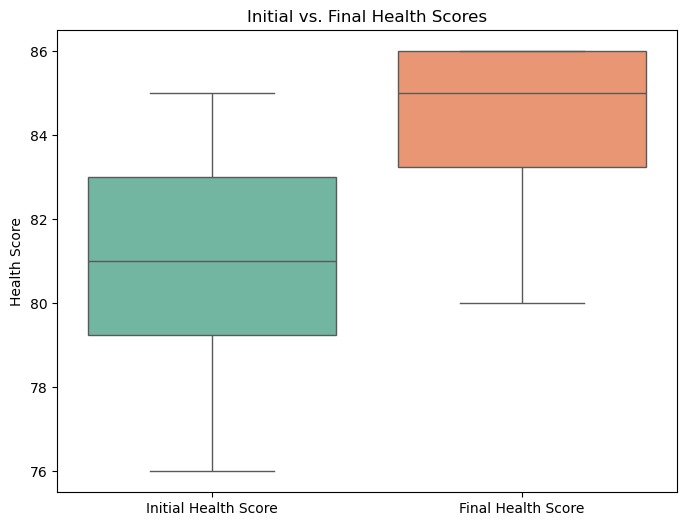

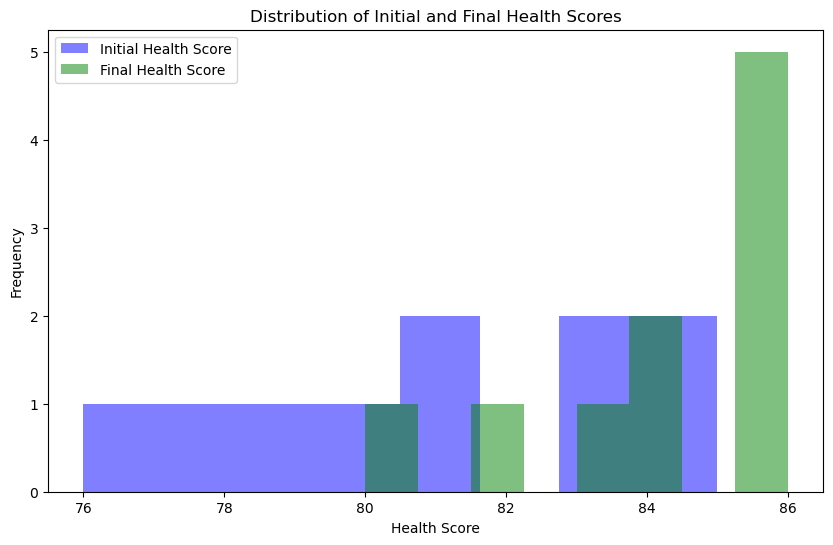

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize initial and final health scores using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[data['InitialHealthScore'], data['FinalHealthScore']], palette="Set2")
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Initial vs. Final Health Scores')
plt.ylabel('Health Score')
plt.show()

# Histogram for visualizing distribution
plt.figure(figsize=(10, 6))
plt.hist(data['InitialHealthScore'], bins=8, alpha=0.5, label='Initial Health Score', color='blue')
plt.hist(data['FinalHealthScore'], bins=8, alpha=0.5, label='Final Health Score', color='green')
plt.title('Distribution of Initial and Final Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

### Quantitative Analysis
We can use bootstrapping to generate a distribution of mean differences between the initial and final health scores. This method allows us to estimate the sampling distribution of the statistic without making assumptions about the underlying population distribution.

### Bootstrapping Process

1. Calculate the difference between the final and initial health scores for each patient.

2. Resample these differences with replacement and calculate the mean difference for each resample.

3. Generate a distribution of mean differences from many bootstrap samples.

4. Use this distribution to assess the significance of the observed mean difference by calculating a p-value.

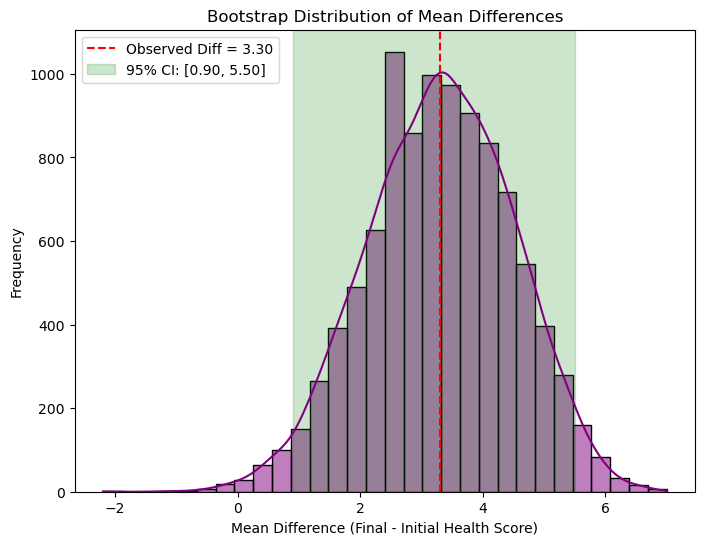

Observed Mean Difference: 3.30
95% Confidence Interval: [0.90, 5.50]


In [52]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(50)

# Calculate the observed mean difference
observed_diff = np.mean(data['FinalHealthScore'] - data['InitialHealthScore'])

# Bootstrapping function
def bootstrap_mean_diff(data, n_bootstrap=10000):
    
    bootstrap_diffs = []
    for _ in range(n_bootstrap):
        sample = data.sample(frac=1, replace=True)
        diff = np.mean(sample['FinalHealthScore'] - sample['InitialHealthScore'])
        bootstrap_diffs.append(diff)
        
    return np.array(bootstrap_diffs)

# Perform bootstrapping
bootstrap_diffs = bootstrap_mean_diff(data)

# Calculate confidence interval
lower_ci = np.percentile(bootstrap_diffs,2.5)
upper_ci = np.percentile(bootstrap_diffs, 97.5)

# Visualize the bootstrap distribution
plt.figure(figsize=(8, 6))
sns.histplot(bootstrap_diffs, kde=True, color='purple', bins=30)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.2f}')
plt.axvspan(lower_ci, upper_ci, alpha=0.2, color='green', label=f'95% CI: [{lower_ci:.2f}, {upper_ci:.2f}]')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Observed Mean Difference: {observed_diff:.2f}")
print(f"95% Confidence Interval: [{lower_ci:.2f}, {upper_ci:.2f}]")

### Conclusion
The observed mean difference between the final and initial health scores is 3.30, which indicates an average improvement in health scores post-vaccine. Additionally, the 95% confidence interval for the mean difference is [0.90, 5.50], meaning we are 95% confident that the true mean difference lies within this range.

Since the confidence interval does not include zero, we have evidence to suggest that there is a statistically significant improvement in health scores due to the vaccine. Therefore, we reject the null hypothesis of "no effect," concluding that the vaccine is effective in improving health.

### Further Considerations
We can also calculate the p-value to determine if we have enough evidence to reject the null hypothesis.

***Question 9***

Yes, I have.